In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/Users/syipchoy/Downloads/archive (1)/Clean_Dataset.csv")

In [17]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.drop(['flight'],axis=1, inplace=True)

In [19]:
data.head()

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [28]:
#making stops int instead of string; jk you cant do that- maybe fill in with average

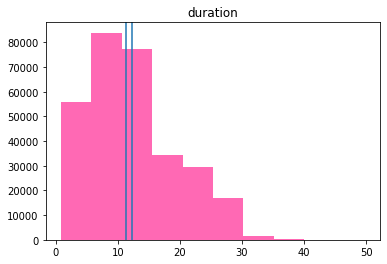

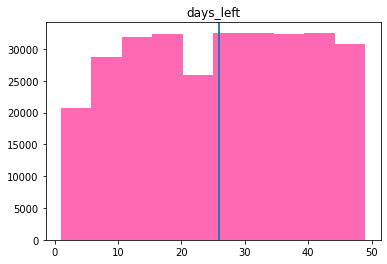

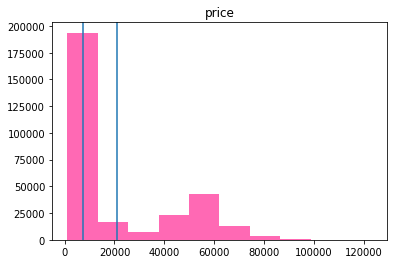

In [15]:
histo = ['duration', 'days_left', 'price']
for col in histo:
    plt.figure()
    plt.hist(data[col], color='hotpink')
    plt.axvline(data[col].mean())
    plt.axvline(data[col].median())
    plt.title(col)
    plt.show()
    
#duration and price are skewed, while days left has a pretty uniform distribution

In [20]:
numerical_predictors = ['duration', 'days_left']

In [6]:
#transform categorical variable to make them work in a regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
categorical_predictors = ['airline', 'source_city', 'departure_time', 'stops',
                          'arrival_time', 'destination_city', 'class']
t = [('cat', OneHotEncoder(), categorical_predictors)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')



In [22]:
all_predictors= categorical_predictors + numerical_predictors
xt = col_transform.fit_transform(data[all_predictors])
xt.shape

(300153, 37)

In [37]:
#split into test and training sets

In [23]:
X = xt
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(xt, y, test_size=0.2, random_state=5)


  (0, 4)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 20)	1.0
  (0, 26)	1.0
  (0, 32)	1.0
  (0, 34)	1.0
  (0, 35)	2.17
  (0, 36)	1.0
  (0, 37)	5953.0
  (1, 4)	1.0
  (1, 8)	1.0
  (1, 13)	1.0
  (1, 20)	1.0
  (1, 25)	1.0
  (1, 32)	1.0
  (1, 34)	1.0
  (1, 35)	2.33
  (1, 36)	1.0
  (1, 37)	5953.0
  (2, 0)	1.0
  (2, 8)	1.0
  (2, 13)	1.0
  (2, 20)	1.0
  (2, 22)	1.0
  :	:
  (300150, 30)	1.0
  (300150, 33)	1.0
  (300150, 35)	13.83
  (300150, 36)	49.0
  (300150, 37)	79099.0
  (300151, 5)	1.0
  (300151, 7)	1.0
  (300151, 13)	1.0
  (300151, 18)	1.0
  (300151, 23)	1.0
  (300151, 30)	1.0
  (300151, 33)	1.0
  (300151, 35)	10.0
  (300151, 36)	49.0
  (300151, 37)	81585.0
  (300152, 5)	1.0
  (300152, 7)	1.0
  (300152, 16)	1.0
  (300152, 18)	1.0
  (300152, 23)	1.0
  (300152, 30)	1.0
  (300152, 33)	1.0
  (300152, 35)	10.08
  (300152, 36)	49.0
  (300152, 37)	81585.0


In [43]:
#going to try out a few different baseline models to see which one works best
#so it's going to be automated

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

models =  [ (LinearRegression, {}), 
            (Ridge, {}), 
            (Lasso, {}), 
            (DecisionTreeRegressor, {}) ]

for Model, args in models: 

    model = Model(**args)                  # instantiate and unpack parameters
    model.fit(X_train, y_train)                       # fit
    yhat = model.predict(X_test)               # predict
    mse = mean_squared_error(y_test, yhat)      # evaluate    
    print('%s: %s' % (Model.__name__, mse))

LinearRegression: 46258936.13466199
Ridge: 46289275.958759755
Lasso: 46261587.72474848
DecisionTreeRegressor: 12162205.375843313
